<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 2 By HGN) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
predict vehicle insurance premium, It is important for insurers to develop models that accurately forecast premium for car insurance.  


<a id="lib"></a>
# 1. Import Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

<a id="prep"></a>
# 1.1 Read Data

In [2]:
df = pd.read_csv('carpremium.csv')
df.head()

FileNotFoundError: ignored

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Understand the Data

In [ ]:
# use 'info()' to understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mileage  16 non-null     float64
 1   Premium  16 non-null     float64
dtypes: float64(2)
memory usage: 384.0 bytes


In [ ]:
# use 'shape' to check the dimension of data
df.shape

(16, 2)

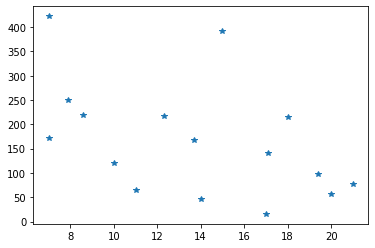

In [ ]:
plt.plot(df['Mileage'],df['Premium'],'*')

In [ ]:
df.corr()

,Mileage,Premium
Mileage,1.000000,-0.475073
Premium,-0.475073,1.000000


<a id="outlier"></a>
## 2.2 Outlier Analysis and Treatment

**Check the outliers in all the variables and treat them using appropriate techniques.**

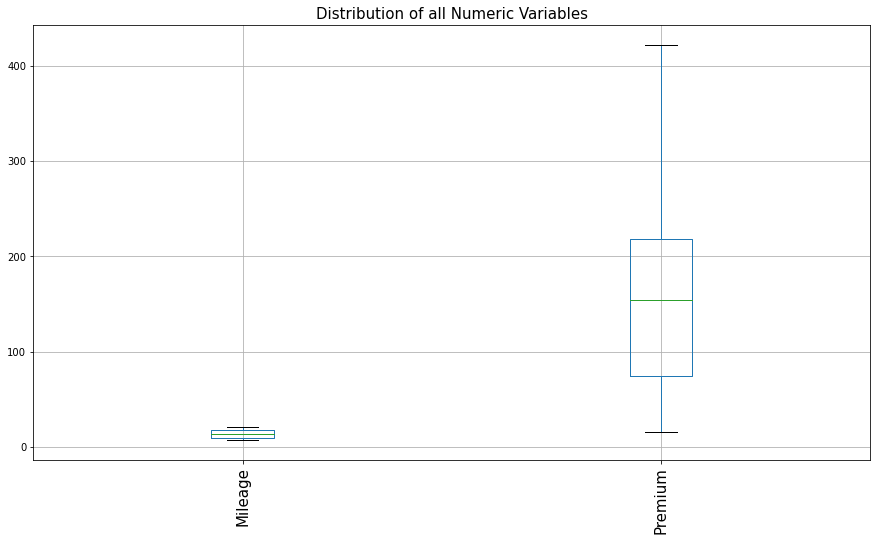

In [ ]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

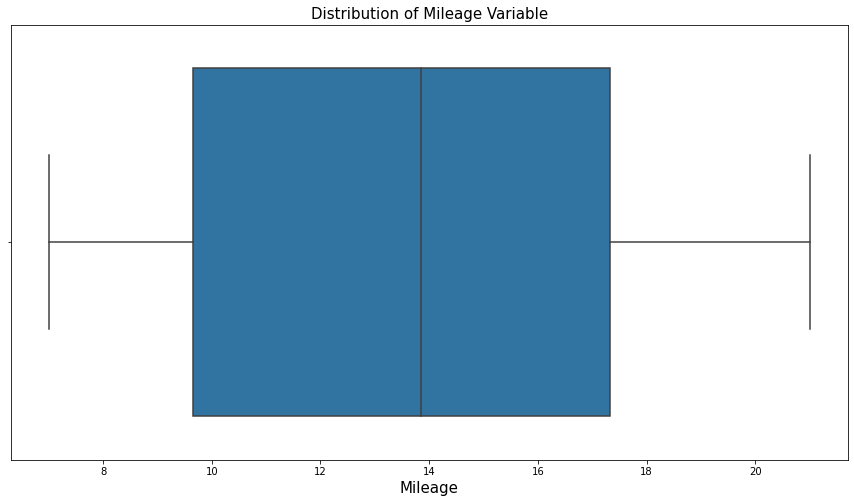

In [ ]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot boxplot for 'Total_Compensation' using seaborn library
sns.boxplot(df['Mileage'])

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Mileage Variable', fontsize = 15)
plt.xlabel('Mileage', fontsize = 15)

# display the plot
plt.show()

In [ ]:
# no outliers

<a id="null"></a>
## 2.3 Missing Value Analysis and Treatment

In [ ]:
df.isnull().sum()

Mileage    0
Premium    0
dtype: int64

In [ ]:
# No missing value

<a id="def"></a>
# 3. What is Regression Analysis?

**For bivariate regression, consider 'Premium' as target variable and 'Mileage' as an independent variable from 'df'.**

The test hypothesis for SLR is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: Slope (beta coefficient of x) is equal to zero</strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: Slope (beta coefficient of x) is not equal to zero</strong> </p>

<a id="lsm"></a>
## 4.1 Ordinary Least Square Method (OLS)

Build the simple linear regression model using the OLS method.

In [ ]:
x=df['Mileage']
y=df['Premium']

In [ ]:
xc=sm.add_constant(x)

In [ ]:
xc

,const,Mileage
0,1.000000,15.000000
1,1.000000,14.000000
2,1.000000,17.000000
3,1.000000,7.000000
4,1.000000,10.000000
5,1.000000,7.000000
6,1.000000,20.000000
7,1.000000,21.000000
8,1.000000,18.000000
9,1.000000,11.000000


In [ ]:
mod=sm.OLS(y,xc)
ols_mod=mod.fit()

In [ ]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     4.081
Date:                Sat, 11 Feb 2023   Prob (F-statistic):             0.0629
Time:                        16:43:57   Log-Likelihood:                -96.370
No. Observations:                  16   AIC:                             196.7
Df Residuals:                      14   BIC:                             198.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        327.0860     83.586      3.913      0.002     147.813     506.359
Mileage      -11.6905      5.787     -2.020      0.063     -24.103       0.722
==============================================================================
Omnibus:                        3.821   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                2.057
Skew:                           0.869   Prob(JB):                        0.357
Kurtosis:                       3.261   Cond. No.                         45.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Example: ypredicted = 327.0860 - 11.6905 *17**
                    = Rs 128.3475 

In [ ]:
# predict the Premium using 'predict()' 
y_slr_pred = ols_mod.predict(xc)

# display the first five predicted values 
y_slr_pred.head()

0   151.728472
1   163.418976
2   128.347466
3   245.252498
4   210.180989
dtype: float64

<a id="mv"></a>
## 4.2 Measures of Variation

In [ ]:
# Variance Measure
# 1. SST = Sum of square Total       sum(ymean - yact)^2 - Total Variance
# 2. SSR = Sum of Square Regression  sum(ymean-ypred)^2  - Explained Variance
# 3. SSE = Sum of Square Error       sum(ypred-yact)^2   - Unexplained Variance

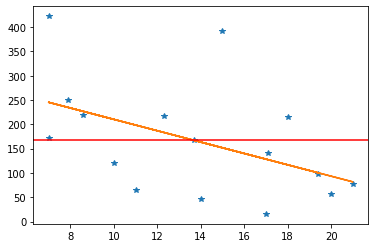

In [ ]:
plt.plot(df['Mileage'],df['Premium'],'*')
plt.plot(df['Mileage'],-11.6905*df['Mileage']+327.0860)
plt.axhline(df['Premium'].mean(), color='r')

<a id="ssr"></a>
### 4.2.1  Sum of Squared Residuals (SSR)

In [ ]:
ssr=np.sum((y.mean()-y_slr_pred)**2)
ssr

46543.24379450413

<a id="sse"></a>
### 4.2.2 Sum of Squared Error (SSE)

In [ ]:
sse=np.sum((y-y_slr_pred)**2)
sse

159678.96224549584

<a id="sst"></a>
### 4.2.3  Sum of Squared Total (SST)

In [ ]:
sst=np.sum((y.mean()-y)**2)
sst

206222.20604000002

In [ ]:
ssr+sse

206222.20603999996

<a id="r2"></a>
### 4.2.4 Coefficient of Determination (R-Squared)

In [ ]:
# calculate R-Squared on  dataset
# use 'rsquared' method from statsmodel
r_sq = ols_mod.rsquared

# print the R-squared value
r_sq

0.22569462662753403

In [ ]:
# calculate R-Squared on train dataset using the formula
r_sq = ssr/sst

# print the R-squared value
r_sq

0.2256946266275337

<a id="see"></a>
### 4.2.5 Standard Error of Estimate (SEE)

In [ ]:
mse=sse/(len(df)-2)
rmse=np.sqrt(mse)
std_err= rmse / np.sqrt(np.sum((x-x.mean())**2))
std_err

5.7871496726011

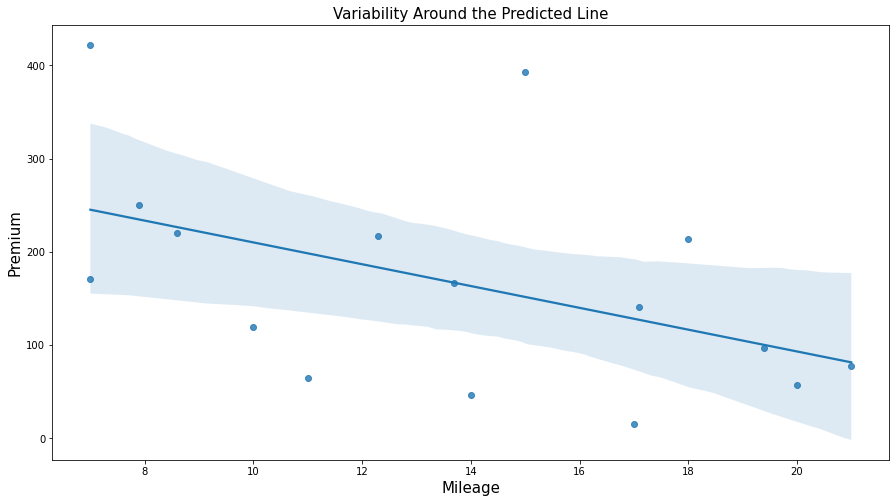

In [ ]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a regression plot
# independent variable on x-axis and dependent variable on y-axis
sns.regplot(x = xc['Mileage'], y = y)

# add axes and plot labels
# set text size using 'fontsize'
plt.title('Variability Around the Predicted Line', fontsize = 15)
plt.xlabel('Mileage', fontsize = 15)
plt.ylabel('Premium', fontsize = 15)

# display the plot
plt.show()

<a id="inf"></a>
## 4.3 Inferences about Slope and Intercept

In [ ]:
# print the model summary
print(ols_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     4.081
Date:                Sat, 11 Feb 2023   Prob (F-statistic):             0.0629
Time:                        16:43:58   Log-Likelihood:                -96.370
No. Observations:                  16   AIC:                             196.7
Df Residuals:                      14   BIC:                             198.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        327.0860     83.586      3.913      0.0

<a id="inter"></a>
### 4.3.1 Interpretation of Slope and Intercept

The output of the regression model returns the value of slope (β1) and Intercept (β0).

Intercept (β0) = 327.0860, indicates that if the Mileage is zero, then the average Premium is 327.0860.

The slope of 'Mileage' (β1) = -11.6905, indicates that by increasing the Mileage percentage by 1%, the average Premium increases by -11.6905.

Thus, the equation of the line given by the model is:

Total_Compensation = 327.0860 + (-11.6905*(Mileage))

<a id="t_test"></a>
### 4.3.2 The t-test for Slope and Intercept

The coefficient of regression captures the presence of a linear relationship between the independent and dependent variables. If the coefficient value is zero, we can infer that there is no linear relationship between the two variables which is statistically important. It is calculated as:
<p style='text-indent:28em'> <strong> t_value = coefficient / Standard_error </strong>  </p>

The test hypothesis for the t-test is given as:
<p style='text-indent:35em'> <strong> H<sub>o</sub>: β<sub>1</sub> = 0 </strong> </p>
<p style='text-indent:35em'> <strong> H<sub>1</sub>: β<sub>1</sub> ≠ 0 </strong> </p>
                                    
Now, let us see how to calculate the t_test value for slope and intercept.

In [ ]:
# perform t_test for intercept
# 'params[0]' returns the value of intercept 
# 'bse[0]' returns the standard error of intercept
t_intercept = ols_mod.params[0] / ols_mod.bse[0]

# print the value of t-statistic
t_intercept

3.9131819572574518

In [ ]:
# t_test for slope
# 'params[1]' returns the value of slope
# 'bse[1]' returns the standard error of slope
t_slope = ols_mod.params[1] / ols_mod.bse[1]

# print the value of t-statistic
t_slope

-2.0200796377682786

In [ ]:
# calculate p-value for intercept
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for intercept
# degrees of freedom = n - 1 = 15 - 1 = 14
pval = stats.t.sf(np.abs(t_intercept), 14)*2 
pval

0.0015607411857769837

In [ ]:
# calculate p-value for slope
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for slope
# degrees of freedom = n - 1 = 15 - 1 = 14
pval = stats.t.sf(np.abs(t_slope), 14)*2 
pval

0.06293775964850629

<a id="ci"></a>
### 4.3.3 Confidence Interval for Slope and Intercept

In [ ]:
from scipy import stats as stats
t_table_value= stats.t.ppf(0.05/2,len(df)-2)

In [ ]:
t_table_value

-2.1447866879169277

In [ ]:
# CI for intercept
# create a tuple using the above formula
# here, t_table_value = 1.9622
CI_inter_min, CI_inter_max = ols_mod.params[0] - (t_table_value*ols_mod.bse[0]), ols_mod.params[0] + (t_table_value*ols_mod.bse[0])

# print the confidence interval for intercept 
print('CI for intercept:', [CI_inter_min , CI_inter_max])

CI for intercept: [506.35949953069144, 147.81254179468183]


In [ ]:
# CI for slope
# create a tuple using the above formula
# here, t_table_value = 1.9622
CI_slope_min, CI_slope_max = ols_mod.params[1] - (t_table_value*ols_mod.bse[1]), ols_mod.params[1] + (t_table_value*ols_mod.bse[1])

# print the confidence interval for slope
print('CI for slope:', [CI_slope_min,CI_slope_max])

CI for slope: [0.7216983644388044, -24.102704793116487]


<a id="anova"></a>
### 4.3.4 ANOVA for SLR

ANOVA (Analysis of Variance) is used to test the significance of the linear regression model. The test hypothesis for ANOVA is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: β<sub>1</sub> = 0 </strong> (i.e. regression model is not significant) </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: β<sub>1</sub> ≠ 0 </strong> (i.e. regression model is significant) </p>

In [ ]:
# build a SLR model using 'ols' method
# pass the regression model to the parameter 'formula'
# concatenate the training dataset and pass to the parameter 'data' to build the model on training dataset
# 'axis=1' concats the data column-wise
# 'fit()' is used to fit the model
slr_ols = ols(formula = 'Premium ~ Mileage', data = pd.concat([xc, y], axis=1)).fit()
# this model returns the same result as of model built using 'OLS' 

In [ ]:
# perform ANOVA on the above model using 'anova_lm'
# pass the linear model to 'anova_lm'
anova_slr = anova_lm(slr_ols)

# print the ANOVA results
anova_slr

,df,sum_sq,mean_sq,F,PR(>F)
Mileage,1.000000,46543.243795,46543.243795,4.080722,0.062938
Residual,14.000000,159678.962245,11405.640160,NaN,NaN
